In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('TRANSACTION01.csv')
df

In [ ]:
df.dtypes

In [ ]:
null_counts = df.isnull().sum()
null_counts

In [ ]:
for column in df.columns:
    # Check the data type of the column
    column_dtype = df[column].dtype

    # Fill missing values based on the data type object as rest were filled
    if column_dtype == 'object':
        df[column] = df[column].fillna('Unknown')

# Verify if all missing values are filled
print(df.isnull().sum())

In [ ]:
df['TD_DTRAN_DATE_TIME'] = pd.to_datetime(df['TD_DTRAN_DATE_TIME'])

In [ ]:
df.nunique()

In [ ]:
mask = df['TD_SFRAUD_1_STATUS'] == 1

In [ ]:
fraud = df[mask]
fraud.tail(10)

In [ ]:
X = df.drop(df.columns[-1], axis=1).columns.tolist()
y = df.iloc[-1, :-1]

In [ ]:
p = []
for i in range(0, 10, 1):
  count = fraud.iloc[:, i].value_counts()
  if y[i] in fraud.iloc[:, i].values:
    freq = count[y[i]]
  else:
    freq = 0
  perc =(freq/len(fraud)*10)
  print(freq)
  print(perc)
  p.append(perc)

In [ ]:
total = 0
for i in range(0, 10, 1):
  total+=p[i]

print(total)

20.100334448160538


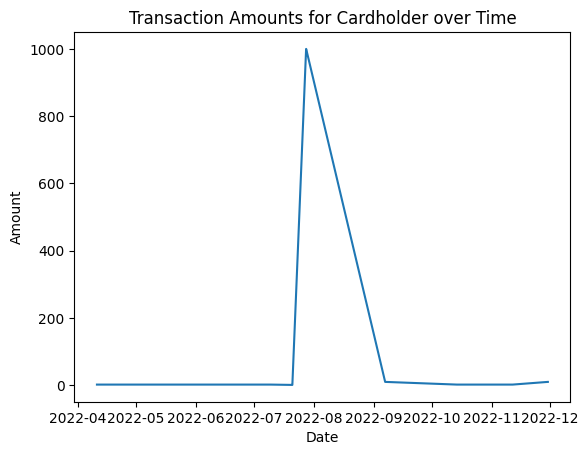

In [ ]:
import matplotlib.pyplot as plt

Customer_name = fraud[fraud['TD_SCARDHOLDER_NAME'] == y[0]]

# Sort the filtered dataset by date
Customer_name = Customer_name.sort_values('TD_DTRAN_DATE_TIME')

# Plot the amount on the y-axis and date on the x-axis
plt.plot(Customer_name['TD_DTRAN_DATE_TIME'], Customer_name['TD_DTRAN_AMOUNT'])
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Transaction Amounts for Cardholder over Time')
plt.show()


In [ ]:
print('The name of the card holder', y[0])
print('-------------------------------------')
cards_used_fraud = fraud[fraud['TD_SCARDHOLDER_NAME'] == y[0]]
cards_used_fraud = cards_used_fraud.sort_values('TD_SMASKEDCARDNUMBER')
print('cards used for fraud:', cards_used_fraud['TD_SMASKEDCARDNUMBER'].value_counts())
print('-------------------------------------')
cards_used_valid = df[df['TD_SCARDHOLDER_NAME'] == y[0]]
cards_used_valid = cards_used_valid.sort_values('TD_SMASKEDCARDNUMBER')
print('Total cards used:', cards_used_valid['TD_SMASKEDCARDNUMBER'].value_counts())
print('-------------------------------------')
cards_valid_fail = cards_used_valid.sort_values('TD_SRESULT')
print('Transacton results:', cards_used_valid['TD_SRESULT'].value_counts())
print('-------------------------------------')

The name of the card holder Roshan Thanikkal
-------------------------------------
cards used for fraud: 424242XXXXXX4242    14
411111XXXXXX1111     9
Name: TD_SMASKEDCARDNUMBER, dtype: int64
-------------------------------------
Total cards used: 411111XXXXXX1111    18304
424242XXXXXX4242    10777
Unknown                19
242424XXXXXX2424        1
Name: TD_SMASKEDCARDNUMBER, dtype: int64
-------------------------------------
Transacton results: SUCCESS        26436
TIMEOUT         1247
FAILURE         1107
INITIATED        310
IN-PROGRESS        1
Name: TD_SRESULT, dtype: int64
-------------------------------------


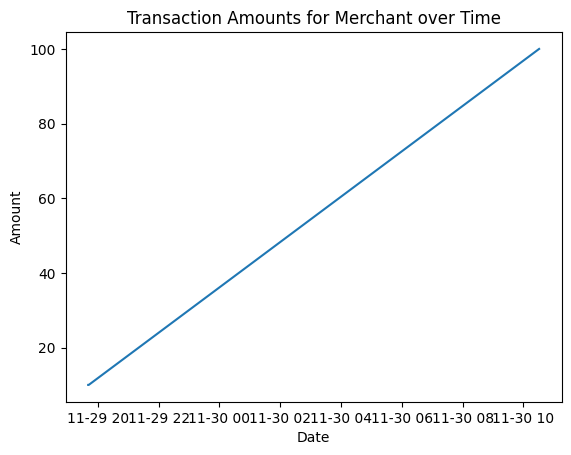

In [ ]:
import matplotlib.pyplot as plt

Merchant_name = fraud[fraud['TD_SMERCHANT_ID'] == y[1]]

# Sort the filtered dataset by date
Merchant_name = Merchant_name.sort_values('TD_DTRAN_DATE_TIME')

# Plot the amount on the y-axis and date on the x-axis
plt.plot(Merchant_name['TD_DTRAN_DATE_TIME'], Merchant_name['TD_DTRAN_AMOUNT'])
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Transaction Amounts for Merchant over Time')
plt.show()

In [ ]:
print('The id of the merchant', y[1])
print('-------------------------------------')
mer_used_fraud = fraud[fraud['TD_SMERCHANT_ID'] == y[1]]
mer_used_fraud = mer_used_fraud.sort_values('TD_SMASKEDCARDNUMBER')
print('cards used for fraud:', mer_used_fraud['TD_SMASKEDCARDNUMBER'].value_counts())
print('-------------------------------------')
mer_fraud_user = mer_used_fraud.sort_values('TD_SCARDHOLDER_NAME')
print('fraud users:', mer_fraud_user['TD_SCARDHOLDER_NAME'].value_counts())

The id of the merchant AJenONMer
-------------------------------------
cards used for fraud: 411111XXXXXX1111    2
424242XXXXXX4242    1
Name: TD_SMASKEDCARDNUMBER, dtype: int64
-------------------------------------
fraud users: Roshan Thanikkal    2
Mukesh Patel        1
Name: TD_SCARDHOLDER_NAME, dtype: int64


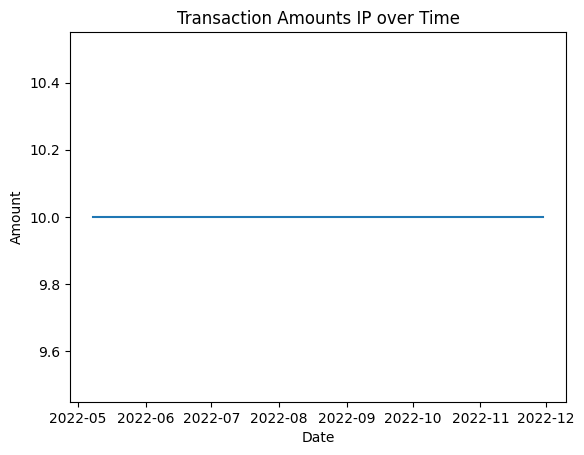

In [ ]:
import matplotlib.pyplot as plt

IP_name = fraud[fraud['TD_SCUST_IP'] == y[4]]

# Sort the filtered dataset by date
IP_name = IP_name.sort_values('TD_DTRAN_DATE_TIME')

# Plot the amount on the y-axis and date on the x-axis
plt.plot(IP_name['TD_DTRAN_DATE_TIME'], IP_name['TD_DTRAN_AMOUNT'])
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Transaction Amounts IP over Time')
plt.show()

In [ ]:
print('The IP address used', y[4])
print('-------------------------------------')
IP_used_fraud = fraud[fraud['TD_SCUST_IP'] == y[4]]
IP_used_fraud = IP_used_fraud.sort_values('TD_SMASKEDCARDNUMBER')
print('cards used for fraud:', IP_used_fraud['TD_SMASKEDCARDNUMBER'].value_counts())
print('-------------------------------------')
IP_used_valid = df[df['TD_SCUST_IP'] == y[4]]
IP_used_valid = IP_used_valid.sort_values('TD_SMASKEDCARDNUMBER')
print('Total cards used:', IP_used_valid['TD_SMASKEDCARDNUMBER'].value_counts())
print('-------------------------------------')
IP_fraud_user = IP_used_fraud['TD_SCARDHOLDER_NAME'].sort_values()
print('Total fraud users:', IP_used_fraud['TD_SCARDHOLDER_NAME'].value_counts())
print('-------------------------------------')

The IP address used 10.10.11.212
-------------------------------------
cards used for fraud: 411111XXXXXX1111    3
Name: TD_SMASKEDCARDNUMBER, dtype: int64
-------------------------------------
Total cards used: 411111XXXXXX1111    7243
424242XXXXXX4242    1651
Name: TD_SMASKEDCARDNUMBER, dtype: int64
-------------------------------------
Total fraud users: Roshan Thanikkal    2
Naved Khan          1
Name: TD_SCARDHOLDER_NAME, dtype: int64
-------------------------------------


In [ ]:
v = df.iloc[: , :-1]

In [ ]:
r = []
q = []
for j in range(0, len(df), 1):
    r.clear()
    for i in range(0, 10, 1):
        u = df.iloc[j, :-1]
        count = fraud.iloc[:, i].value_counts()
        if u[i] in fraud.iloc[:, i].values:
            freq = count[u[i]]
        else:
            freq = 0
        r.append(freq)
    q.append(sum(r)/len(fraud)*10)
    print(j)

In [ ]:
percentage = q

df['percentage'] = percentage

In [ ]:
df.head(10)

,TD_SCARDHOLDER_NAME,TD_SMERCHANT_ID,TD_SINSTITUTION_ID,TD_SMASKEDCARDNUMBER,TD_SCUST_IP,TD_STERMINAL_ID,TD_SRESULT,TD_DTRAN_DATE_TIME,TD_STRAN_CURRENCY,TD_DTRAN_AMOUNT,TD_SFRAUD_1_STATUS,percentage
0,Naksh h,MER2,INS2,411111XXXXXX1111,NaN,TERR2,Success,17-11-19 10:36,INR,2000.0,0,7.525084
1,s s,statusapi,I1AA,411111XXXXXX1111,NaN,razorpay,Success,17-11-19 10:36,INR,10.0,0,8.461538
2,akanksha sawant,NaN,NaN,411111XXXXXX1111,NaN,razorpay,Failure,17-11-19 10:36,INR,10.0,0,8.227425
3,akanksha sawant,statusapi,I1AA,411111XXXXXX1111,NaN,razorpay,TIMEOUT,17-11-19 10:36,INR,10.0,0,8.361204
4,a s,PY9TST,I1AA,535353XXXXXX3106,NaN,ConBillTer,Failure,17-11-19 10:36,INR,1.0,0,1.438127
5,akanksha sawant,statusapi,I1AA,411111XXXXXX1111,NaN,razorpay,Success,17-11-19 10:36,INR,10.0,0,8.461538
6,akanksha sawant,statusapi,I1AA,411111XXXXXX1111,NaN,razorpay,Success,11-10-19 11:20,INR,10.0,0,8.461538
7,Diksha Ragase,PY9TST,I1AA,466666XXXXXX4791,NaN,ConBillTer,Pending,11-10-19 11:20,INR,1.0,0,1.371237
8,Diksha Ragase,statusapi,I1AA,466666XXXXXX4791,NaN,razorpay,Pending,11-10-19 11:26,INR,10.0,0,2.006689
9,akanksha sawant,statusapi,I1AA,411111XXXXXX1111,NaN,razorpay,Success,11-10-19 11:55,INR,10.0,0,8.461538


In [ ]:
table = pd.DataFrame()

table['Card_Holder_Name'] = [y[0]]
table['Cards_Used'] = [cards_used_valid['TD_SMASKEDCARDNUMBER'].value_counts()]
table['Cards_Fraud'] = [cards_used_fraud['TD_SMASKEDCARDNUMBER'].value_counts()]
table['Transaction_Result'] = [cards_used_valid['TD_SRESULT'].value_counts()]
table['Merchant_ID'] = [y[1]]
table['Fraud_Cards_Merchant'] = [mer_used_fraud['TD_SMASKEDCARDNUMBER'].value_counts()]
table['Fraud_User_Merchant'] = [mer_fraud_user['TD_SCARDHOLDER_NAME'].value_counts()]
table['IP_address'] = [y[4]]
table['Fraud_Cards_IP'] = [IP_used_fraud['TD_SMASKEDCARDNUMBER'].value_counts()]
table['Cards_used_IP'] = [IP_used_valid['TD_SMASKEDCARDNUMBER'].value_counts()]
table['Fraud_Users_IP'] = [IP_used_fraud['TD_SCARDHOLDER_NAME'].value_counts()]

print(table.head())

In [ ]:
table.to_csv('demo.csv', index=False)
table

,Card_Holder_Name,Cards_Used,Cards_Fraud,Transaction_Result,Merchant_ID,Fraud_Cards_Merchant,Fraud_User_Merchant,IP_address,Fraud_Cards_IP,Cards_used_IP,Fraud_Users_IP
0,Roshan Thanikkal,411111XXXXXX1111 7243 424242XXXXXX4242 1...,424242XXXXXX4242 14 411111XXXXXX1111 9 ...,SUCCESS 7289 TIMEOUT 1190 FAILURE 41...,AJenONMer,411111XXXXXX1111 2 424242XXXXXX4242 1 Na...,Roshan Thanikkal 2 Mukesh Patel 1 Na...,10.10.11.212,411111XXXXXX1111 3 Name: TD_SMASKEDCARDNUMB...,411111XXXXXX1111 7243 424242XXXXXX4242 1...,Roshan Thanikkal 2 Naved Khan 1 Na...
